# Credit Card fraud detection
Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,

or Random Forests to classify transactions as fraudulent or

legitimate.

## About Dataset
## About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Source of Simulation
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

## Information about the Simulator
I do not own the simulator. I used the one used by Brandon Harris and just to understand how it works, I went through few portions of the code. This is what I understood from what I read:

The simulator has certain pre-defined list of merchants, customers and transaction categories. And then using a python library called "faker", and with the number of customers, merchants that you mention during simulation, an intermediate list is created.

After this, depending on the profile you choose for e.g. "adults 2550 female rural.json" (which means simulation properties of adult females in the age range of 25-50 who are from rural areas), the transactions are created. Say, for this profile, you could check "Sparkov | Github | adults_2550_female_rural.json", there are parameter value ranges defined in terms of min, max transactions per day, distribution of transactions across days of the week and normal distribution properties (mean, standard deviation) for amounts in various categories. Using these measures of distributions, the transactions are generated using faker.

What I did was generate transactions across all profiles and then merged them together to create a more realistic representation of simulated transactions.

## Acknowledgements
Brandon Harris for his amazing work in creating this easy-to-use simulation tool for creating fraud transaction datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
train = pd.read_csv("/content/drive/MyDrive/data/fraudTrain.csv")
test = pd.read_csv("/content/drive/MyDrive/data/fraudTest.csv")

In [3]:
train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
test.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,28812 Charles Mill Apt. 628,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [5]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [6]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


<ipython-input-8-c215b965aca0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = "RdBu")


<Axes: >

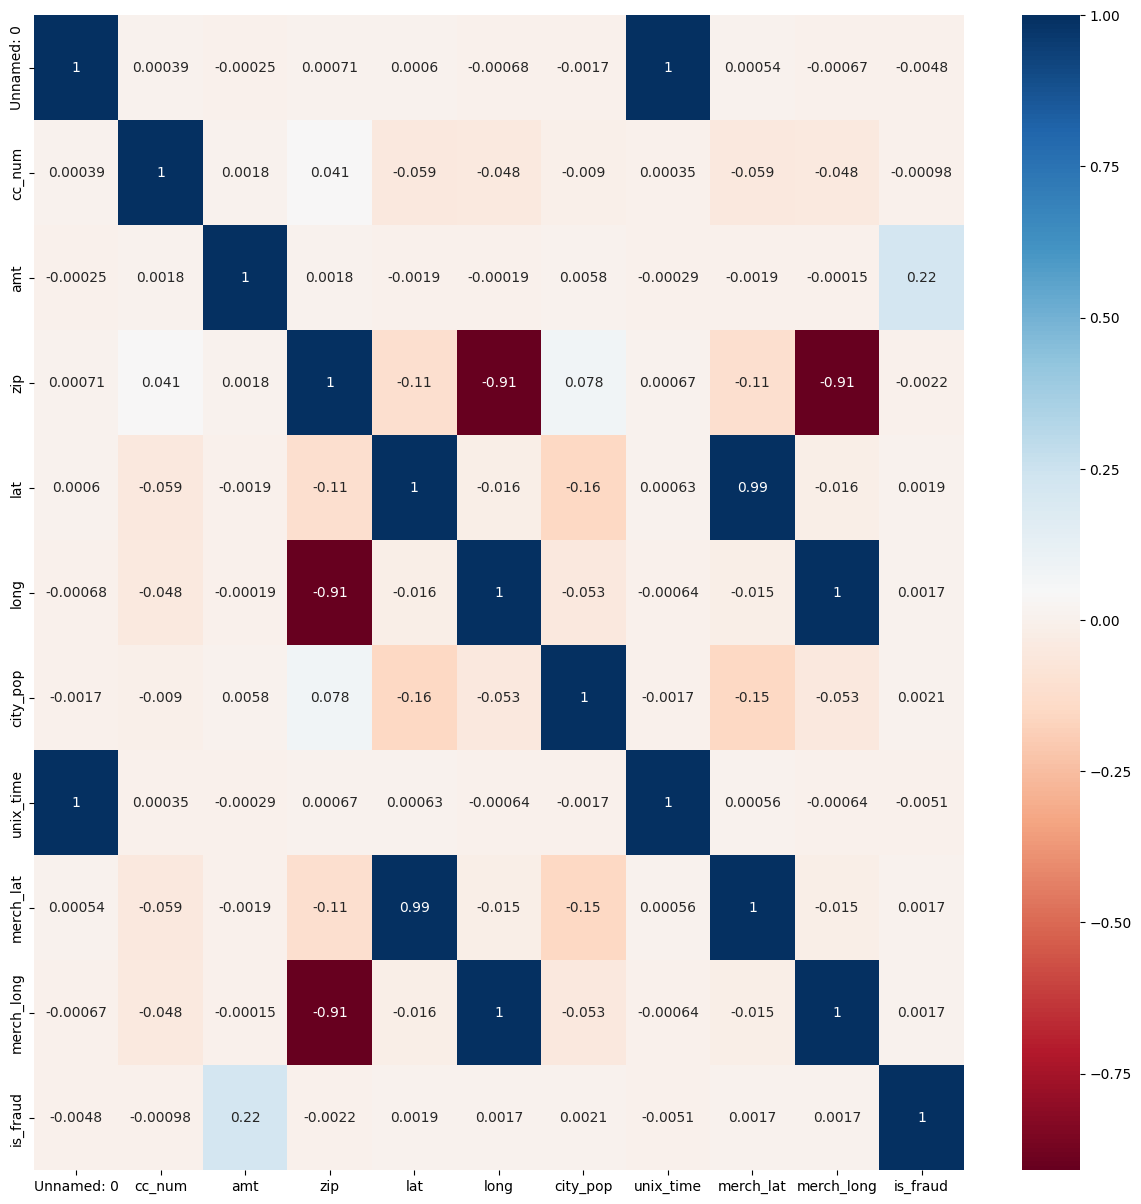

In [8]:
plt.figure(figsize = (15, 15))
sns.heatmap(train.corr(), annot = True, cmap = "RdBu")

In [10]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [21]:
attributes_selected = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop','unix_time', 'merch_lat', 'merch_long']

In [22]:
X_train = train[attributes_selected]
X_test = test[attributes_selected]
y_train = train['is_fraud']
y_test = test["is_fraud"]

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   zip         1296675 non-null  int64  
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   unix_time   1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 89.0 MB


In [24]:
ct =  make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8]),
        # (OneHotEncoder(handle_unknown = "ignore"), [1, 3, 4, 5]),
        remainder = "passthrough"
    )

In [25]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

In [26]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [29]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation= "relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_1.fit(X_train_norm,
            y_train,
            epochs = 5,
            validation_data = [X_test_norm, y_test],
            validation_steps = int(0.15*len([X_test_norm, y_test])))

Epoch 1/5
40522/40522 [==============================] - 91s 2ms/step - loss: 0.0313 - accuracy: 0.9938
Epoch 2/5
40522/40522 [==============================] - 106s 3ms/step - loss: 0.0239 - accuracy: 0.9942
Epoch 3/5
40522/40522 [==============================] - 114s 3ms/step - loss: 0.0233 - accuracy: 0.9943
Epoch 4/5
40522/40522 [==============================] - 127s 3ms/step - loss: 0.0231 - accuracy: 0.9944
Epoch 5/5
40522/40522 [==============================] - 125s 3ms/step - loss: 0.0229 - accuracy: 0.9944


In [31]:
print(f"{model_1.evaluate(X_test_norm, y_test)[1]*100} %")
MLP = model_1.evaluate(X_test_norm, y_test)[1]*100

17367/17367 [==============================] - 28s 2ms/step - loss: 0.0173 - accuracy: 0.9957
99.56812858581543 %
17367/17367 [==============================] - 28s 2ms/step - loss: 0.0173 - accuracy: 0.9957


In [32]:
model_2 = RandomForestClassifier()
model_2.fit(X_train_norm, y_train)
print(f"Accuracy: {model_2.score(X_test_norm, y_test)*100}")

Accuracy: 99.5668674276028


In [34]:
RFC = model_2.score(X_test_norm, y_test)*100

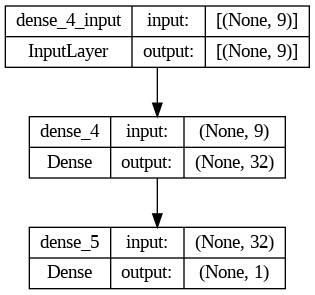

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes = True)

In [40]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                320       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [44]:
pred = model_2.predict(X_test_norm)
accuracy = accuracy_score(y_true = y_test, y_pred = pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)


Text(0.5, 1.0, 'Evlauation of the random forest classifier')

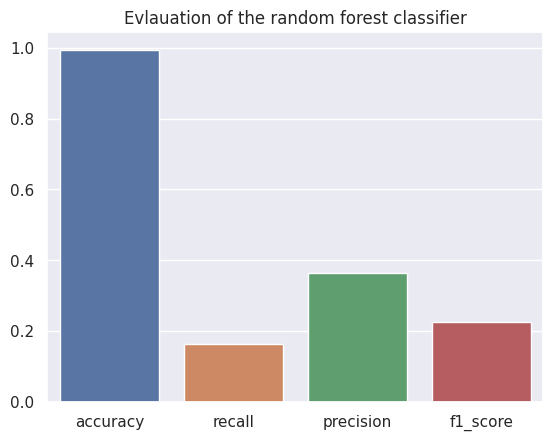

In [49]:
sns.set_theme()
sns.barplot(y = [accuracy, recall, precision, f1], x = ["accuracy", 'recall', 'precision', 'f1_score'])
plt.title("Evlauation of the random forest classifier")

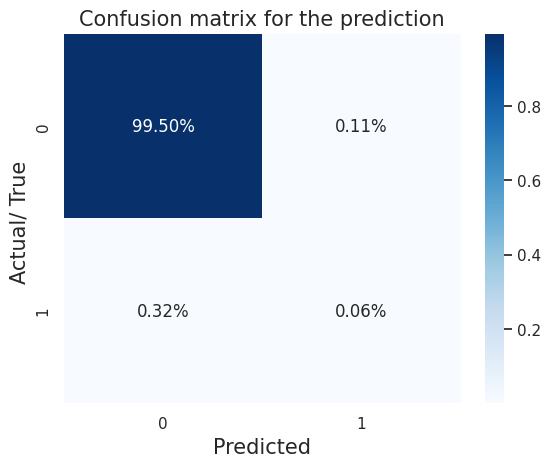

In [60]:
sns.heatmap((confusion_matrix(y_true = y_test, y_pred = pred))/np.sum(confusion_matrix(y_true = y_test, y_pred = pred)),fmt = '0.2%',  annot = True, cmap = 'Blues')
plt.title("Confusion matrix for the prediction", fontsize = 15)
plt.xlabel("Predicted", fontsize = 15)
plt.ylabel("Actual/ True ", fontsize = 15);